# Imports (En esta sección vamos a importar todas las librerias que precisaremos)

In [1]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as back

import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

# Colocamos la seed para poder replicar los experimentos más delante
seed=1998
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


# Variables Globales

In [0]:
batch_size = 128
num_classes = 10
epochs = 200
img_rows, img_cols = 28, 28
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Dataset prep (En esta sección vamos a preparar el dataset para que tenga el formato optimo para clasificar)

## Loading the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_demo = x_test
y_test_demo = y_test

11493376/11490434 [==============================] - 0s 0us/step


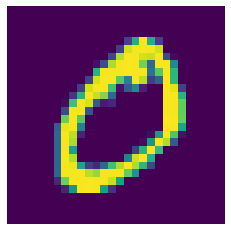

In [4]:
plt.imshow(x_train[1])
plt.axis('off')
plt.show()

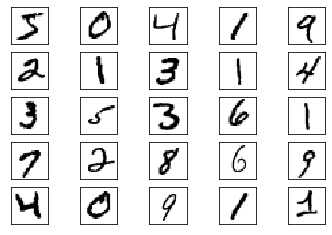

In [5]:
plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [0]:
if back.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
print('train_images shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

train_images shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Building the model (En esta sección vamos a configurar nuestro dataset de manera que obtengamos un resultado mayor al 70% de accuracy)

In [0]:
# Model 1
# acc:  0.8384 (12 Epochs)
# acc: 0.9541 (200 Epochs)
model = Sequential([
        Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
])

# Model 2
# acc:  0.7384
# model = Sequential([
#         Conv2D(34, kernel_size=(5, 5),
#                  activation='relu',
#                  input_shape=input_shape),
#         MaxPooling2D(pool_size=(2, 2)),
#         Conv2D(64, (5, 5), activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),
#         Flatten(),
#         Dense(128, activation='relu'),
#         Dropout(0.5),
#         Dense(num_classes, activation='softmax')
# ])

# Model 3
# acc:  0.70
# model = Sequential([
#         Conv2D(32, kernel_size=(5, 5),
#                  activation='relu',
#                  input_shape=input_shape),
#         MaxPooling2D(pool_size=(2, 2)),
#         Conv2D(6, (5, 5), activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Flatten(),
#         Dense(1024, activation='relu'),
#         Dropout(0.4),
#         Dense(num_classes, activation='softmax')
# ])

In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [12]:
hst = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 204us/sample - loss: 2.2815 - accuracy: 0.1383 - val_loss: 2.2458 - val_accuracy: 0.2110
Epoch 2/200
60000/60000 [==============================] - 5s 79us/sample - loss: 2.2209 - accuracy: 0.2281 - val_loss: 2.1673 - val_accuracy: 0.3768
Epoch 3/200
60000/60000 [==============================] - 5s 78us/sample - loss: 2.1392 - accuracy: 0.3226 - val_loss: 2.0613 - val_accuracy: 0.5714
Epoch 4/200
60000/60000 [==============================] - 5s 79us/sample - loss: 2.0300 - accuracy: 0.4212 - val_loss: 1.9225 - val_accuracy: 0.6712
Epoch 5/200
60000/60000 [==============================] - 5s 79us/sample - loss: 1.8902 - accuracy: 0.5057 - val_loss: 1.7450 - val_accuracy: 0.7281
Epoch 6/200
60000/60000 [==============================] - 5s 78us/sample - loss: 1.7198 - accuracy: 0.5663 - val_loss: 1.5367 - val_accuracy: 0.7544
Epoch 7/200
60000/60000 [=======================

# Eval

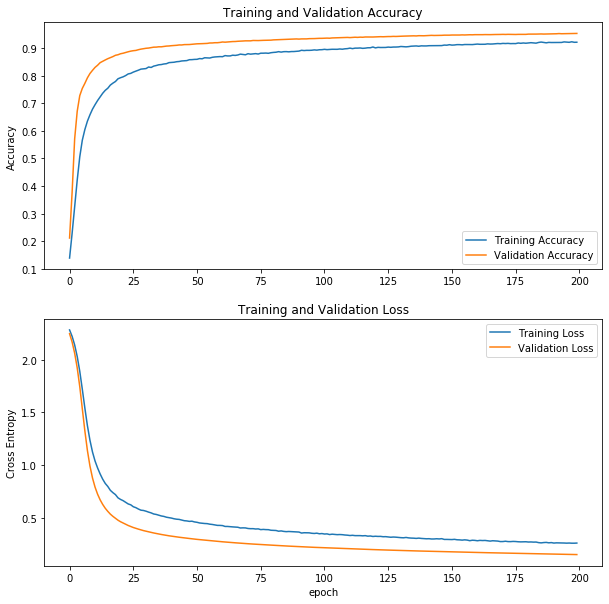

In [13]:
acc = hst.history['accuracy']
val_acc = hst.history['val_accuracy']

loss = hst.history['loss']
val_loss = hst.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [14]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 0.15348183989450334
Accuracy: 0.954


# Make Predictions

In [0]:
predictions = model.predict(x_test)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

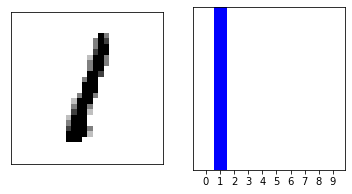

In [17]:
import random

i = random.randrange(0, 10001, 1)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_demo, x_test_demo)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_demo)
plt.show()